In [1]:
from functions import *
import matplotlib.pyplot as plt
from matplotlib import colors

# Generate color plots

In [2]:
generation_size = 256
number_of_generations = 200

#Initialize m(x,0)
zeroth_generation = [Cell(b=0, h=0) for _ in range(generation_size)]

#Define the fitness function. These parameters give rise to diffusive behavior.
fitness_diffusive = FitnessFunctionConfig(alpha=1, beta=-0.1, gamma=0)

#Define the comparison function between potential parents (set p=1 to select the individual with the largest fitness with probability 1).
comparison_diffusive = ComparisonFunctionConfig(fitness_function_config=fitness_diffusive, 
                                                p=1,
                                                sigma=0.1)

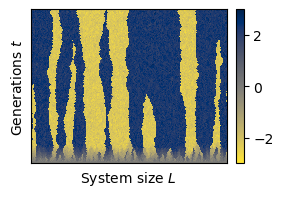

In [3]:
#Generate color plot
result_diffusive = convert_cells_to_heatmap(simulate_until_last_generation(
                                            zeroth_generation=zeroth_generation,
                                            comparison_function_config=comparison_diffusive,
                                            last_generation_number=number_of_generations))

#Plotting
fig, ax = plt.subplots(figsize=(3,2))

divnorm = colors.TwoSlopeNorm(vcenter=0., vmin=-3, vmax=3)
orig_map=plt.cm.get_cmap('cividis')
reversed_map = orig_map.reversed()

pos = plt.imshow(result_diffusive, cmap=reversed_map, interpolation='none', norm=divnorm, origin='lower')
fig.colorbar(pos, fraction=0.035, pad=0.04, ticks=[-2,0,2])

plt.xticks([])
plt.yticks([])
plt.xlabel(r'System size $L$')
plt.ylabel(r'Generations $t$')
plt.show()

# Determine the fixation time

In [4]:
generation_size = 64

#Initialize m(x,0)
zeroth_generation = [Cell(b=0, h=0) for _ in range(generation_size)]

#Define the fitness function. These parameters give rise to diffusive behavior.
fitness_diffusive = FitnessFunctionConfig(alpha=1, beta=-0.1, gamma=0)

#Define the comparison function between potential parents (set p=1 to select the individual with the largest fitness with probability 1).
comparison_diffusive = ComparisonFunctionConfig(fitness_function_config=fitness_diffusive, 
                                                p=1,
                                                sigma=0.1)

#Determine the fixation time.
fixation_time = simulate_until_fixation(zeroth_generation=zeroth_generation,
                        comparison_function_config=comparison_diffusive)
print(f'The time to fixation is: {fixation_time} generations')


The time to fixation is: 2699 generations


# Find sector boundary variance

In [5]:
generation_size = 256
number_of_generations = 200

#Initialize m(x,0)
zeroth_generation_first_half = [ Cell(b=1, h=0) for _ in range(generation_size // 2)]
zeroth_generation_second_half = [ Cell(b=0, h=1) for _ in range(generation_size // 2)]
zeroth_generation = zeroth_generation_first_half + zeroth_generation_second_half

#Define the fitness function. These parameters give rise to superdiffusive behavior.
fitness_superdiffusive = FitnessFunctionConfig(alpha=1, beta=0, gamma=0)

#Define the comparison function between potential parents (set p=1 to select the individual with the largest fitness with probability 1).
comparison_superdiffusive = ComparisonFunctionConfig(fitness_function_config=fitness_superdiffusive, 
                                                p=1,
                                                sigma=0.1)

#Calculate the variance of sector boundary fluctuations
sector_variance = calculate_transverse_fluctuations(zeroth_generation=zeroth_generation,
                                            zeroth_sector_boundary=generation_size//2-1,
                                            comparison_function_config=comparison_superdiffusive,
                                            number_of_generations=number_of_generations)

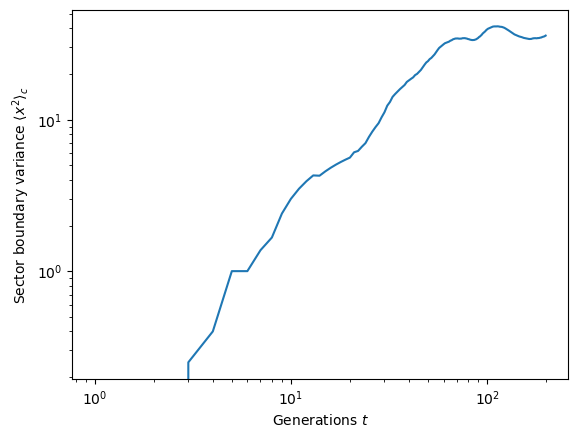

In [8]:
#Plotting
plt.plot(sector_variance)

plt.xlabel('Generations $t$')
plt.ylabel(r'Sector boundary variance $\langle x^2 \rangle_c$')
plt.xscale('log')
plt.yscale('log')